In [1]:
#Iris.csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [3]:
iris_data = pd.read_csv("Iris.csv")


In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
linear_svm = SVC(kernel='linear') #creating Linear kernel
linear_svm.fit(X_train, y_train) #Training Linear Kernel
linear_predictions = linear_svm.predict(X_test) 

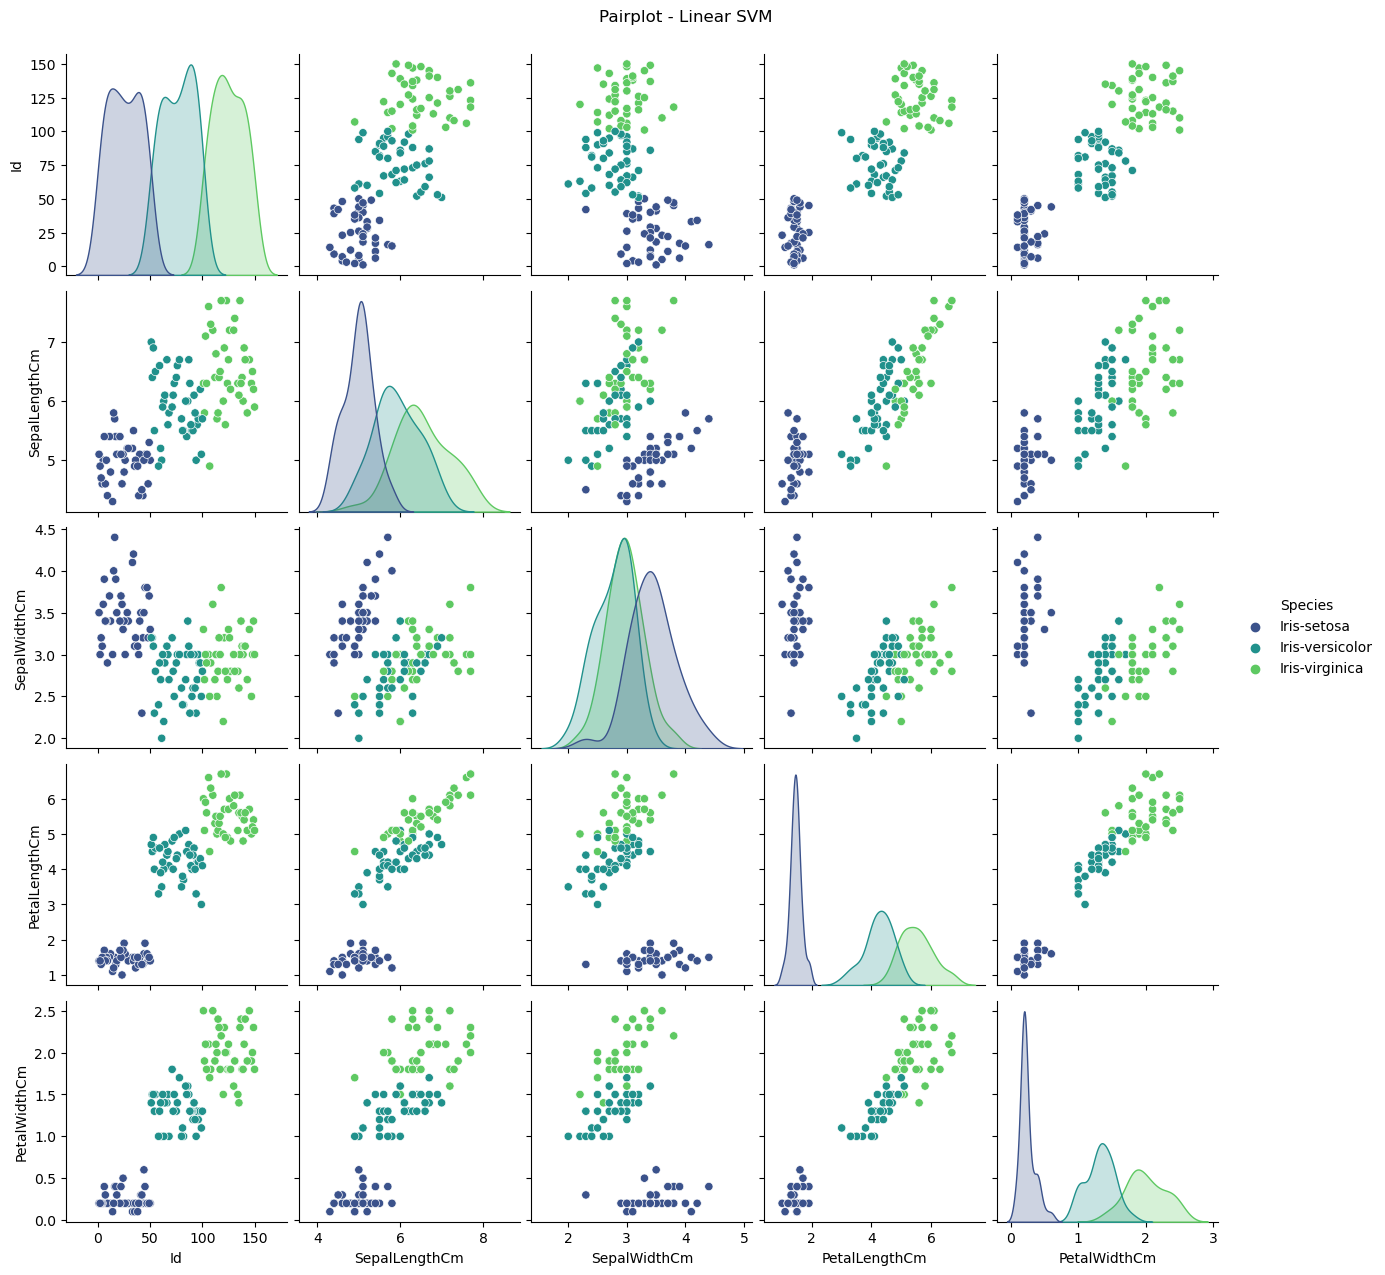

In [8]:
linear_data = X_train.copy()
linear_data['Species'] = y_train
sns.pairplot(linear_data, hue="Species", palette="viridis")
plt.suptitle("Pairplot - Linear SVM", y=1.02)
plt.show()

In [11]:
best_accuracy = 0 #initial value of accuracy
best_c, best_gamma = None, None #initial values of C and Gamma

for c in [0.1, 1, 10, 100]:
    for gamma in [0.1, 0.01, 0.001]:
        rbf_svm = SVC(kernel='rbf', C=c, gamma=gamma)
        rbf_svm.fit(X_train, y_train)
        rbf_predictions = rbf_svm.predict(X_test)
        accuracy = accuracy_score(y_test, rbf_predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c, best_gamma = c, gamma

print(f"Best C: {best_c}, Best Gamma: {best_gamma}")


Best C: 0.1, Best Gamma: 0.01


In [12]:
best_rbf_svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_rbf_svm.fit(X_train, y_train)
best_rbf_predictions = best_rbf_svm.predict(X_test)


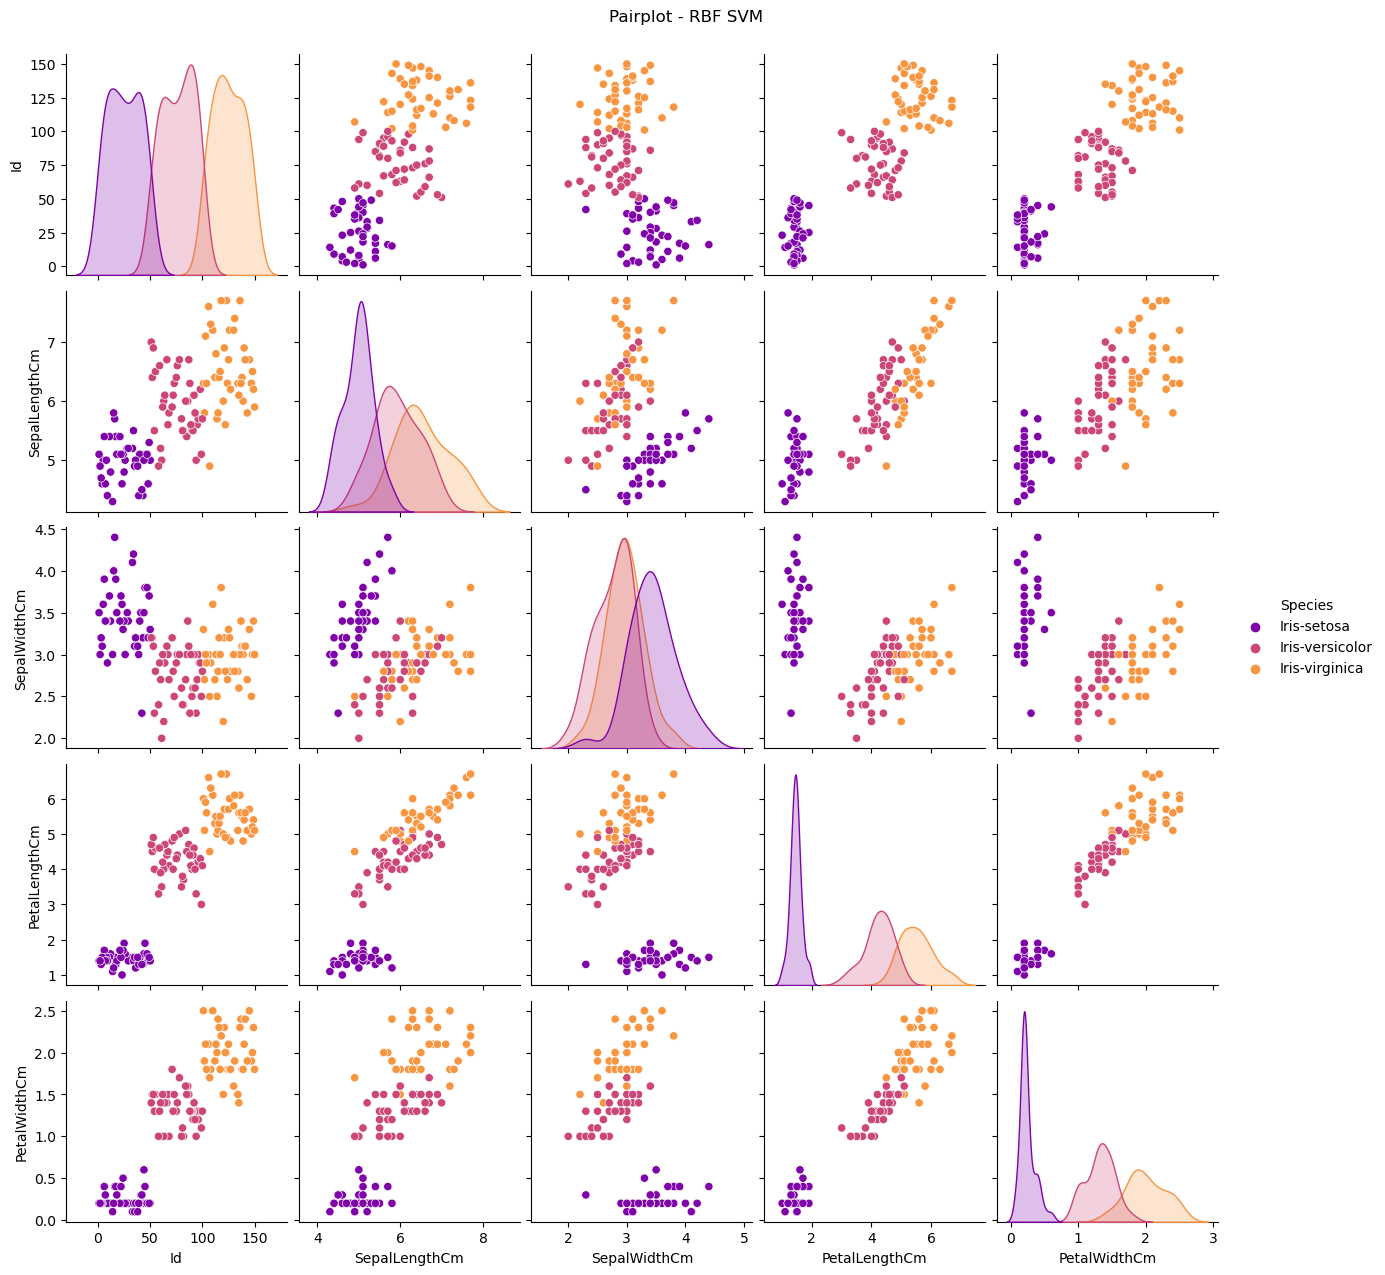

In [13]:
rbf_data = X_train.copy()
rbf_data['Species'] = y_train
sns.pairplot(rbf_data, hue="Species", palette="plasma")
plt.suptitle("Pairplot - RBF SVM", y=1.02)
plt.show()

In [14]:
print("Linear SVM:")
print(f"Accuracy: {accuracy_score(y_test, linear_predictions)}")
print("Classification Report:\n", classification_report(y_test, linear_predictions))


Linear SVM:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



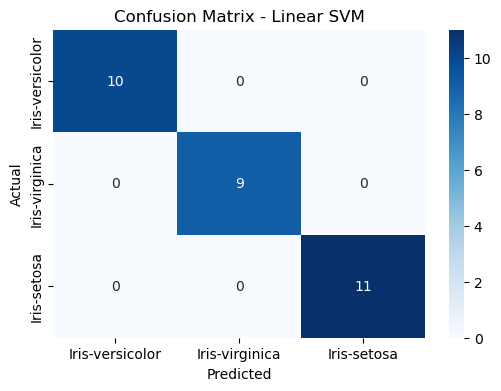

In [15]:
linear_cm = confusion_matrix(y_test, linear_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(linear_cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
print("\nRBF SVM:")
print(f"Accuracy: {accuracy_score(y_test, best_rbf_predictions)}")
print("Classification Report:\n", classification_report(y_test, best_rbf_predictions))


RBF SVM:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



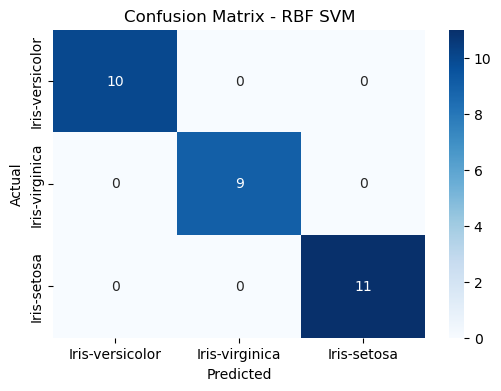

In [17]:
rbf_cm = confusion_matrix(y_test, best_rbf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()